<a href="https://colab.research.google.com/github/adhiutama17/MKBigData/blob/main/TugasMKBigData_TextSummarize_LSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Daftar Isi



*   Pendahuluan
*   Teori
*   Metode
*   Uji Coba
*   Validasi
*   Test

##Pendahuluan
Era Internet menyediakan beragam informasi yang bisa diakses kapan pun dan dimana pun, misalnya berita elektronik, iklan, kursus online, hingga artikel-artikel ilmiah. Contoh terakhir menjadi salah satu sumber informasi yang wajib di dunia pendidikan khususnya pendidikan tinggi. Artikel ilmiah didefinisikan sebagai karya ilmu pengetahuan yang menyajikan fakta umum dan ditulis dengan metodologi penulisan yang baik dan benar. Konten dari artikel ilmiah dapat berupa penelitian, ulasan teori, hingga ide baru seseorang didasarkan suatu permasalahan. Menurut World Bank , dari tahun 2000 hingga 2018 tercatat lebih dari 2,5 juta artikel ilmiah yang terpublikasi melalui berbagai macam lembaga publikasi dengan pengelompokkan bidang tertentu. Pembaca artikel ilmiah perlu menemukan informasi dan gagasan penulis dari teks yang ditulis. Selain artikel ilmiah yang terpublikasi, terdapat juga artikel yang belum terpublikasi berupa paper, jurnal, atau artikel esai perlombaan mahasiswa.

##Dasar Teori

###Text Summarization

Text Summarization (Ringkasan Teks) merupakan teks yang terdiri atas satu atau dua kalimat yang menyampaikan informasi penting dari teks yang asli, biasanya jumlah kalimat tidak lebih dari setengah teks yang asli bahkan lebih sedikit

*   Extractive

mengidentifikasi bagian penting dari teks dan ditulis kembali dalam teks yang ringkas. Pendekatan ini akan bergantung pada kalimat-kalimat yang tercantum pada teks tersebut

*   Abstractive

mengidentifikasi dan mengintepretasikan bagian penting dari teks dengan membuat kalimat yang baru. Kalimat baru dari pendekatan ini dapat dimungkinkan tidak menggunakan kalimat yang tercantum tetapi yang lain dengan makna yang sama



##Coding
akan digunakan github sebagai repository online

In [ ]:
import shutil
#Untuk hapus folder repository --> untuk selanjutnya diupdate
shutil.rmtree('MKBigData')

In [ ]:
!git clone https://github.com/adhiutama17/MKBigData
!ls MKBigData

Cloning into 'MKBigData'...
remote: Enumerating objects: 140, done.
remote: Counting objects: 100% (140/140), done.
remote: Compressing objects: 100% (128/128), done.
remote: Total 140 (delta 75), reused 38 (delta 10), pack-reused 0
Receiving objects: 100% (140/140), 2.04 MiB | 5.87 MiB/s, done.
Resolving deltas: 100% (75/75), done.
'Buku Panduan AIC terbaru.pdf'
 FixTugas_TextSummarization.ipynb
 stopword-indo.txt
 Summarization_using_Latent_Semantic_Analysis.ipynb
 Teks
 Tugas.ipynb
 TugasMKBigData_TextSummarize_LSA.ipynb
 Tugas_TextSummarization.ipynb


In [ ]:
#File Path untuk Teks yang akan diolah
#Contoh file yang akan diolah telah ditempatkan di folder MKBigData/Teks/
pdf_path = 'MKBigData/Teks/Abdul Rohman_Universitas Airlangga_Provider R_D.pdf' #file dalam bentuk PDF maka diperlukan tools pdfminer

In [ ]:
pip install pdfminer.six

     |████████████████████████████████| 5.6 MB 4.1 MB/s 
     |████████████████████████████████| 3.6 MB 39.9 MB/s 


###Pre-Proces - Membukan File PDF, Replace "\n" dan lowercase

In [ ]:
from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfinterp import resolve1
from pdfminer.high_level import extract_text

file = open(pdf_path, 'rb') #membuka file pdf
parser = PDFParser(file)
document = PDFDocument(parser)

print(resolve1(document.catalog['Pages'])['Count']) #mendapatkan jumlah halaman, karena terdapat halaman yang tidak diperlukan nantinya

16


In [ ]:
#membuka file pdf dengan halaman yang spesifik
text_pages = extract_text(pdf_path, page_numbers = range(1,8)).replace("\n" or "\x0c","").lower()
#replace "\n" karena setiap line pdf dipisahkan "\n", diganti "" (kosong)
#lower() semua kata lowercase

text_pages_split = text_pages.split(". ") #setiap kalimat (yang dipisahkan ". ") akan dipisah menjadi list)
print(text_pages_split)

['pandemi  coronavirus  disease  (covid-19)  menyerang  seluruh  penjuru dunia  termasuk  indonesia', ' menurut  data  yang  dirilis  worldometers.info  pada tanggal  16  juli  2021,  indonesia  menempati  urutan  ke-14  dalam  daftar  negara dengan jumlah kasus positif covid-19 terbanyak', 'pada bulan juni sampai juli, kasus perharinya  naik  mencapai  10.000  lebih  hingga  56.000  kasus  covid-19  hal  ini mengindikasikan bahwa penularan covid-19 di indonesia semakin masif', 'padahal dampak  yang  ditimbulkan  dari  pandemi  ini  sangat  besar  dan  mempengaruhi berbagai aspek kehidupan, salah satunya adalah aspek ekonomi', 'aspek ekonomi yang  terdampak  paling  signifikan  adalah  di  sektor  industri  dengan  penyumbang angka pengangguran tertinggi', ' indonesia mengalami kontraksi pertumbuhan ekonomi pada kuartal i tahun 2021', ' menurut  data  badan  pusat  statistika  (bps)  yang  dilansir  oleh  bps.go.id, pertumbuhan  ekonomi  indonesia  pada  triwulan  i-2021  terhadap  tri

In [ ]:
len(text_pages_split)

83

In [ ]:
hal_awal = 1
hal_akhir = 8
documents_list = []
file_pdf = open(pdf_path, 'rb') #membuka file pdf
parser = PDFParser(file_pdf)
document = PDFDocument(parser)
file_text = extract_text(pdf_path, page_numbers = range(hal_awal,hal_akhir))
text_split = file_text.split(". ")
for sentence in text_split:
  documents_list.append(sentence)

In [ ]:
text_split

['Pandemi  Coronavirus  Disease  (COVID-19)  menyerang  seluruh  penjuru \n\ndunia  termasuk  Indonesia',
 ' Menurut  data  yang  dirilis  Worldometers.info  pada \n\ntanggal  16  Juli  2021,  Indonesia  menempati  urutan  ke-14  dalam  daftar  negara \n\ndengan jumlah kasus positif covid-19 terbanyak',
 'Pada Bulan Juni sampai Juli, kasus \n\nperharinya  naik  mencapai  10.000  lebih  hingga  56.000  kasus  covid-19  Hal  ini \n\nmengindikasikan bahwa penularan COVID-19 di Indonesia semakin masif',
 'Padahal \n\ndampak  yang  ditimbulkan  dari  pandemi  ini  sangat  besar  dan  mempengaruhi \n\nberbagai aspek kehidupan, salah satunya adalah aspek ekonomi',
 'Aspek Ekonomi \n\nyang  terdampak  paling  signifikan  adalah  di  sektor  industri  dengan  penyumbang \n\nangka pengangguran tertinggi',
 ' \n\nIndonesia mengalami kontraksi pertumbuhan ekonomi pada kuartal I tahun \n\n2021',
 ' Menurut  data  Badan  Pusat  Statistika  (BPS)  yang  dilansir  oleh  bps.go.id, \n\npertumbuhan  eko

In [ ]:
pip install PySastrawi

     |████████████████████████████████| 210 kB 4.3 MB/s 


In [ ]:
import nltk
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stop_factory = StopWordRemoverFactory()

#menambahkan stopword yang didapatkan dari library lainnya
tambah_stopword = open('MKBigData/stopword-indo.txt',"r").readlines()
tambah_stopword_clr = [item.replace("\n", "") for item in tambah_stopword]
data_stop = stop_factory.get_stop_words() + tambah_stopword_clr
stopword = stop_factory.create_stop_word_remover()
#print(data) #menampilkan stopword

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

tokenizer = RegexpTokenizer(r'\w+')
texts = []
for i in text_split:
  # clean and tokenize document string
  raw = i.lower()
  tokens = tokenizer.tokenize(raw)
  # remove stop words from tokens
  stopped_tokens = [i for i in tokens if not i in data_stop]
  # stem tokens
  stemmed_tokens = [stemmer.stem(i) for i in stopped_tokens]
  # add tokens to list
  texts.append(stemmed_tokens)

In [ ]:
texts

[['pandemi',
  'coronavirus',
  'disease',
  'covid',
  '19',
  'serang',
  'penjuru',
  'dunia',
  'indonesia'],
 ['data',
  'rilis',
  'worldometers',
  'info',
  'tanggal',
  '16',
  'juli',
  '2021',
  'indonesia',
  'tempat',
  'urut',
  '14',
  'daftar',
  'negara',
  'positif',
  'covid',
  '19'],
 ['juni',
  'juli',
  'hari',
  'capai',
  '10',
  '000',
  '56',
  '000',
  'covid',
  '19',
  'indikasi',
  'tular',
  'covid',
  '19',
  'indonesia',
  'masif'],
 ['dampak',
  'timbul',
  'pandemi',
  'pengaruh',
  'aspek',
  'hidup',
  'salah',
  'satu',
  'aspek',
  'ekonomi'],
 ['aspek',
  'ekonomi',
  'dampak',
  'signifikan',
  'sektor',
  'industri',
  'sumbang',
  'angka',
  'anggur',
  'tinggi'],
 ['indonesia', 'alami', 'kontraksi', 'tumbuh', 'ekonomi', 'kuartal', '2021'],
 ['data',
  'badan',
  'pusat',
  'statistika',
  'bps',
  'lansir',
  'bps',
  'go',
  'id',
  'tumbuh',
  'ekonomi',
  'indonesia',
  'triwulan',
  '2021',
  'triwulan',
  '2020',
  'minus',
  '0',
  '74

In [ ]:
dictionary = corpora.Dictionary(texts)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in texts]

In [ ]:
# generate LSA model
lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [ ]:
start = 1
stop = 10
step = 1
number_of_topics = 10
words = 20

coherence_values = []
model_list = []
for num_topics in range(start, stop, step):
  # generate LSA model
  model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
  model_list.append(model)
  coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
  coherence_values.append(coherencemodel.get_coherence())

print(model.print_topics(num_topics=number_of_topics, num_words=words))

[(0, '0.542*"mahasiswa" + 0.532*"teliti" + 0.321*"industri" + 0.196*"dana" + 0.158*"ide" + 0.151*"aju" + 0.137*"guna" + 0.130*"milik" + 0.126*"fitur" + 0.107*"bantu" + 0.098*"selesai" + 0.091*"masyarakat" + 0.088*"kait" + 0.081*"butuh" + 0.080*"nama" + 0.080*"timbang" + 0.071*"perintah" + 0.068*"sedia" + 0.061*"tingkat" + 0.059*"fungsi"'), (1, '0.410*"indonesia" + -0.290*"teliti" + 0.257*"generasi" + 0.195*"kualitas" + 0.171*"milenial" + 0.171*"demografi" + 0.166*"ide" + 0.163*"industri" + 0.148*"hadap" + 0.147*"masyarakat" + -0.138*"dana" + 0.138*"masalah" + 0.137*"era" + 0.135*"ekonomi" + 0.134*"covid" + 0.134*"19" + 0.124*"produktivitas" + 0.119*"tumbuh" + 0.115*"bangsa" + 0.103*"bps"'), (2, '-0.615*"industri" + 0.302*"mahasiswa" + -0.204*"produk" + 0.183*"generasi" + 0.170*"ide" + -0.130*"negeri" + -0.123*"negara" + 0.111*"milik" + 0.110*"milenial" + -0.109*"masalah" + -0.100*"kelola" + -0.094*"alami" + 0.093*"peran" + 0.091*"kualitas" + -0.089*"ekonomi" + -0.086*"daya" + -0.086*"s

In [ ]:
coherence_values

[0.4175603504778295,
 0.37251959658711586,
 0.37196023820813195,
 0.4283364199217335,
 0.4174790441431123,
 0.37251959658711586,
 0.37196023820813195,
 0.4174790441431123,
 0.37196023820813195]

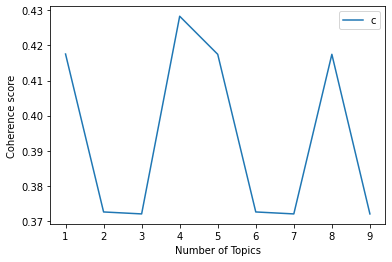

In [ ]:
x = range(start, stop, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
corpus_lsi = model[doc_term_matrix]

In [ ]:
print(corpus_lsi[0].sort)

<built-in method sort of list object at 0x7fd450de5f50>


In [ ]:
list(enumerate(corpus_lsi))

[(0,
  [(0, 0.09401918500582122),
   (1, 0.831443553792651),
   (2, -0.0745716344427068),
   (3, 0.2901730472235405),
   (4, -0.8412275411763811),
   (5, 0.25054538281786926),
   (6, 0.21991873841167886),
   (7, -1.1817183952013008),
   (8, 0.31695627510925295),
   (9, -0.060003497787884365)]),
 (1,
  [(0, 0.1292568989798304),
   (1, 1.1281690760464544),
   (2, -0.23636830222610952),
   (3, 0.38639651259471436),
   (4, -1.275397636611715),
   (5, 0.39651065055901874),
   (6, 0.22678037610455018),
   (7, -1.6181409958783641),
   (8, 0.47600845190354196),
   (9, 0.14924741688574264)]),
 (2,
  [(0, 0.11337755948029297),
   (1, 1.343430186695778),
   (2, -0.15111192051273412),
   (3, 0.5949204148909161),
   (4, -1.6876935963621957),
   (5, 0.4994066615921357),
   (6, 0.5379095674799901),
   (7, -3.1126320412468864),
   (8, 0.8723887588489756),
   (9, -0.16510412959570628)]),
 (3,
  [(0, 0.11099130686102042),
   (1, 0.4014450631890037),
   (2, -0.32411188612956443),
   (3, -0.33025463119762

In [ ]:
for doc, as_text in zip(corpus_lsi, text_split):
    print(doc, as_text)

[(0, 0.09401918500582122), (1, 0.831443553792651), (2, -0.0745716344427068), (3, 0.2901730472235405), (4, -0.8412275411763811), (5, 0.25054538281786926), (6, 0.21991873841167886), (7, -1.1817183952013008), (8, 0.31695627510925295), (9, -0.060003497787884365)] Pandemi  Coronavirus  Disease  (COVID-19)  menyerang  seluruh  penjuru 

dunia  termasuk  Indonesia
[(0, 0.1292568989798304), (1, 1.1281690760464544), (2, -0.23636830222610952), (3, 0.38639651259471436), (4, -1.275397636611715), (5, 0.39651065055901874), (6, 0.22678037610455018), (7, -1.6181409958783641), (8, 0.47600845190354196), (9, 0.14924741688574264)]  Menurut  data  yang  dirilis  Worldometers.info  pada 

tanggal  16  Juli  2021,  Indonesia  menempati  urutan  ke-14  dalam  daftar  negara 

dengan jumlah kasus positif covid-19 terbanyak
[(0, 0.11337755948029297), (1, 1.343430186695778), (2, -0.15111192051273412), (3, 0.5949204148909161), (4, -1.6876935963621957), (5, 0.4994066615921357), (6, 0.5379095674799901), (7, -3.1126

In [ ]:
def takenext(elem):
	"""
	sort
	"""
	return elem[1]

In [1]:
vecsSort = list(map(lambda i: list(), range(80)))
for i,docv in enumerate(corpus_lsi):
	for sc in docv:
		isent = (i, abs(sc[i]))
		vecsSort[sc[0]].append(isent)
vecsSort = list(map(lambda x: sorted(x,key=takenext,reverse=True), vecsSort))	

NameError: ignored

###Pre-Process - Remove Punctuation
punctuation yang dihilangkan '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

In [ ]:
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~''' #tanda baca yang dihilangkan
for i in range(len(text_pages_split)):
  word = ""
  for char in text_pages_split[i]:
    if char not in punc:
      word += char
  text_pages_split[i] = word

print(text_pages_split)

['pandemi  coronavirus  disease  covid19  menyerang  seluruh  penjuru dunia  termasuk  indonesia', ' menurut  data  yang  dirilis  worldometersinfo  pada tanggal  16  juli  2021  indonesia  menempati  urutan  ke14  dalam  daftar  negara dengan jumlah kasus positif covid19 terbanyak', 'pada bulan juni sampai juli kasus perharinya  naik  mencapai  10000  lebih  hingga  56000  kasus  covid19  hal  ini mengindikasikan bahwa penularan covid19 di indonesia semakin masif', 'padahal dampak  yang  ditimbulkan  dari  pandemi  ini  sangat  besar  dan  mempengaruhi berbagai aspek kehidupan salah satunya adalah aspek ekonomi', 'aspek ekonomi yang  terdampak  paling  signifikan  adalah  di  sektor  industri  dengan  penyumbang angka pengangguran tertinggi', ' indonesia mengalami kontraksi pertumbuhan ekonomi pada kuartal i tahun 2021', ' menurut  data  badan  pusat  statistika  bps  yang  dilansir  oleh  bpsgoid pertumbuhan  ekonomi  indonesia  pada  triwulan  i2021  terhadap  triwulan  i2020  minus

###Pre-Proces - Stopword Removal
stopword yang digunakan adalah bahasa Indonesia, yakni dari sastrawi dan tambahan lainnya

In [ ]:
pip install Sastrawi

     |████████████████████████████████| 209 kB 9.7 MB/s 


In [ ]:
import nltk
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stop_factory = StopWordRemoverFactory()
#menambahkan stopword yang didapatkan dari library lainnya
tambah_stopword = open('MKBigData/stopword-indo.txt',"r").readlines()
tambah_stopword_clr = [item.replace("\n", "") for item in tambah_stopword]
data = stop_factory.get_stop_words() + tambah_stopword_clr
stopword = stop_factory.create_stop_word_remover()
print(data) #menampilkan stopword

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [ ]:
len(data)

884

Generate teks tanpa stopword

In [ ]:
text_no_stop = []
for i in range(len(text_pages_split)):
  no_stopword = stopword.remove(text_pages_split[i])
  text_no_stop.append(no_stopword)

print(text_no_stop)

['pandemi  coronavirus  disease  covid19  menyerang  seluruh  penjuru dunia  termasuk  indonesia', '  data   dirilis  worldometersinfo  tanggal  16  juli  2021  indonesia  menempati  urutan  ke14   daftar  negara jumlah kasus positif covid19 terbanyak', 'bulan juni juli kasus perharinya  naik  mencapai  10000  lebih  hingga  56000  kasus  covid19   mengindikasikan penularan covid19 indonesia semakin masif', 'padahal dampak   ditimbulkan   pandemi   sangat  besar   mempengaruhi berbagai aspek kehidupan salah satunya aspek ekonomi', 'aspek ekonomi  terdampak  paling  signifikan    sektor  industri   penyumbang angka pengangguran tertinggi', ' indonesia mengalami kontraksi pertumbuhan ekonomi kuartal i tahun 2021', '  data  badan  pusat  statistika  bps   dilansir   bpsgoid pertumbuhan  ekonomi  indonesia   triwulan  i2021   triwulan  i2020  minus  074  persen  yony', '  triwulan  sebelumnya  mengalami  kontraksi sebesar  minus  096  persen  yony', ' rendahnya  pertumbuhan  ekonomi  diseb

In [ ]:
text_no_stop

['pandemi  coronavirus  disease  covid19  menyerang  seluruh  penjuru dunia  termasuk  indonesia',
 '  data   dirilis  worldometersinfo  tanggal  16  juli  2021  indonesia  menempati  urutan  ke14   daftar  negara jumlah kasus positif covid19 terbanyak',
 'bulan juni juli kasus perharinya  naik  mencapai  10000  lebih  hingga  56000  kasus  covid19   mengindikasikan penularan covid19 indonesia semakin masif',
 'padahal dampak   ditimbulkan   pandemi   sangat  besar   mempengaruhi berbagai aspek kehidupan salah satunya aspek ekonomi',
 'aspek ekonomi  terdampak  paling  signifikan    sektor  industri   penyumbang angka pengangguran tertinggi',
 ' indonesia mengalami kontraksi pertumbuhan ekonomi kuartal i tahun 2021',
 '  data  badan  pusat  statistika  bps   dilansir   bpsgoid pertumbuhan  ekonomi  indonesia   triwulan  i2021   triwulan  i2020  minus  074  persen  yony',
 '  triwulan  sebelumnya  mengalami  kontraksi sebesar  minus  096  persen  yony',
 ' rendahnya  pertumbuhan  ekonom

In [ ]:
text_clr = [txt.replace("\x0c", "") for txt in text_no_stop]

In [ ]:
text_clr

['pandemi  coronavirus  disease  covid19  menyerang  seluruh  penjuru dunia  termasuk  indonesia',
 '  data   dirilis  worldometersinfo  tanggal  16  juli  2021  indonesia  menempati  urutan  ke14   daftar  negara jumlah kasus positif covid19 terbanyak',
 'bulan juni juli kasus perharinya  naik  mencapai  10000  lebih  hingga  56000  kasus  covid19   mengindikasikan penularan covid19 indonesia semakin masif',
 'padahal dampak   ditimbulkan   pandemi   sangat  besar   mempengaruhi berbagai aspek kehidupan salah satunya aspek ekonomi',
 'aspek ekonomi  terdampak  paling  signifikan    sektor  industri   penyumbang angka pengangguran tertinggi',
 ' indonesia mengalami kontraksi pertumbuhan ekonomi kuartal i tahun 2021',
 '  data  badan  pusat  statistika  bps   dilansir   bpsgoid pertumbuhan  ekonomi  indonesia   triwulan  i2021   triwulan  i2020  minus  074  persen  yony',
 '  triwulan  sebelumnya  mengalami  kontraksi sebesar  minus  096  persen  yony',
 ' rendahnya  pertumbuhan  ekonom

###Pre-Proces - Word Count
menghitung kata yang terdapat dalam setiap elemen list

In [ ]:
dic = {}
for sentence in text_clr:
  for word in sentence.split():
    if word in dic:
      dic[word] = dic[word] + 1
    else:
      dic[word]=1
dic_items = dic.items()
sorted_dic = sorted(dic_items, key=lambda x: x[1], reverse=True)
for word,freq in sorted_dic:
  print(word,freq)

mahasiswa 36
industri 28
indonesia 18
ide 16
penelitian 15
pengguna 12
lebih 10
masyarakat 10
maupun 10
permasalahan 9
generasi 9
beberapa 9
fitur 9
berbagai 8
ini 8
menjadi 8
produk 8
akan 8
covid19 7
negara 7
ekonomi 7
mengalami 7
tahun 7
tersebut 7
peneliti 7
platform 7
halaman 7
pertumbuhan 6
2020 6
negeri 6
peningkatan 6
rd 6
demografi 6
milenial 6
pandemi 5
kebijakan 5
dalam 5
membuat 5
menghadapi 5
suatu 5
memiliki 5
keadaan 5
pemerintah 5
bangsa 5
baik 5
pembangunan 5
ilmu 5
adanya 5
bentuk 5
diajukan 5
kualitas 5
provider 5
dana 5
sangat 4
bps 4
persen 4
sebesar 4
tidak 4
banyak 4
daya 4
kerja 4
merupakan 4
pengembangan 4
menyelesaikan 4
khususnya 4
membantu 4
terkait 4
dilakukan 4
bonus 4
era 4
produktivitas 4
pertanyaan 4
sama 4
kasus 3
semakin 3
aspek 3
penyumbang 3
triwulan 3
eksternal 3
selama 3
raw 3
material 3
murah 3
mahal 3
peluang 3
tersendiri 3
impor 3
bahan 3
ada 3
melakukan 3
inflasi 3
beli 3
tinggi 3
berpikir 3
2045 3
pengetahuan 3
teknologi 3
kolaborasi 3
penemu

##LSA Modelling

tools yang diimport

In [ ]:
pip install nltk

In [ ]:
import os.path
import nltk
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt